# Inserción en Árboles Splay

La operación de inserción en un árbol Splay es una operación crítica que no solo añade un nuevo nodo al árbol sino que también aprovecha la oportunidad para reorganizar el árbol de manera que el nodo recién insertado se mueva cerca de la raíz. Esto se alinea con la estrategia general de los árboles Splay de mantener los elementos recientemente accedidos en posiciones de fácil acceso.

## Concepto de Inserción

La inserción en un árbol Splay sigue dos pasos principales:

1. **Inserción como en un Árbol de Búsqueda Binaria (BST):** Primero, el nuevo nodo se inserta siguiendo las reglas de un BST normal. Si el valor del nuevo nodo es menor que el valor del nodo actual y el nodo actual no tiene un subárbol izquierdo, el nuevo nodo se convierte en el subárbol izquierdo del nodo actual. Si el nodo actual tiene un subárbol izquierdo, el proceso se repite recursivamente en el subárbol izquierdo. Se sigue una lógica similar para el subárbol derecho si el valor del nuevo nodo es mayor.

2. **Operación de Splay:** Después de insertar el nuevo nodo, se realiza una operación de splay sobre este nodo. Esto significa que el nodo se "splayea" o se mueve a la raíz del árbol a través de una serie de rotaciones específicas (zig, zig-zig, zig-zag), optimizando así el árbol para accesos futuros.

## Recursos

<a href="https://www.cs.usfca.edu/~galles/visualization/SplayTree.html" target="_blank">visualization/SplayTree</a>

## Implementación en Python

In [4]:
# Código utilitario
from src.visualization import visualize_bt

In [5]:
# La clase Node define la estructura básica de un nodo dentro de un árbol
# binario.
class Node:
    # El método inicializador crea un nuevo nodo con el dato proporcionado y
    # establece sus hijos izquierdo y derecho a None.
    def __init__(self, data):
        self.data = data  # Almacena el dato pasado al nodo.
        self.left = None  # Inicializa el hijo izquierdo del nodo como None.
        self.right = None  # Inicializa el hijo derecho del nodo como None.

# La clase SplayTree representa un árbol splay, un tipo especial de árbol de
# búsqueda binario.
class SplayTree:
    # El método inicializador crea un nuevo árbol splay sin nodos (es decir, con
    # la raíz igual a None).
    def __init__(self):
        self.root = None  # Establece la raíz del árbol a None.

    # Método para realizar una rotación a la derecha en el árbol.
    def rightRotate(self, x):
        print(f"Realizando rotación a la derecha en el nodo con dato {x.data}")
        y = x.left
        x.left = y.right
        y.right = x
        return y  # Retorna el nuevo subárbol después de la rotación.

    # Método para realizar una rotación a la izquierda en el árbol.
    def leftRotate(self, x):
        print(f"Realizando rotación a la izquierda en el nodo con dato {x.data}")
        y = x.right
        x.right = y.left
        y.left = x
        return y  # Retorna el nuevo subárbol después de la rotación.

    # Método splay ajusta el árbol para que el nodo con el dato buscado sea
    # movido a la raíz.
    def splay(self, root, data):
        # Si la raíz es None o contiene el dato buscado, no se realiza ninguna
        # acción.
        if root is None or root.data == data:
            return root

        # Si el dato es menor que el dato en la raíz, se realizan operaciones en
        # el subárbol izquierdo.
        if root.data > data:
            # Si no hay subárbol izquierdo, no se puede continuar y se retorna
            # la raíz.
            if root.left is None:
                return root
            # Rotaciones dobles o simples se realizan dependiendo del valor del
            # hijo izquierdo.
            if root.left.data > data:
                root.left.left = self.splay(root.left.left, data)
                root = self.rightRotate(root)
            elif root.left.data < data:
                root.left.right = self.splay(root.left.right, data)
                if root.left.right:
                    root.left = self.leftRotate(root.left)
            return self.rightRotate(root) if root.left else root

        # Si el dato es mayor que el dato en la raíz, se realizan operaciones en
        # el subárbol derecho.
        else:
            # Si no hay subárbol derecho, no se puede continuar y se retorna la
            # raíz.
            if root.right is None:
                return root
            # Rotaciones dobles o simples se realizan dependiendo del valor del
            # hijo derecho.
            if root.right.data > data:
                root.right.left = self.splay(root.right.left, data)
                if root.right.left:
                    root.right = self.rightRotate(root.right)
            elif root.right.data < data:
                root.right.right = self.splay(root.right.right, data)
                root = self.leftRotate(root)
            return self.leftRotate(root) if root.right else root

    # Método para insertar un nuevo dato en el árbol.
    def insert(self, data):
        print(f"Insertando dato {data} en el árbol")
        # Si el árbol está vacío, se crea una nueva raíz con el dato.
        if not self.root:
            self.root = Node(data)
            return
        # Se realiza la operación splay para el dato y se ajusta el árbol.
        self.root = self.splay(self.root, data)
        # Si el dato ya existe en el árbol, no se realiza la inserción.
        if self.root.data == data:
            return
        # Se crea un nuevo nodo y se reajusta el árbol con este nuevo nodo como
        # raíz.
        new_node = Node(data)
        if self.root.data > data:
            new_node.right = self.root
            new_node.left = self.root.left
            self.root.left = None
        else:
            new_node.left = self.root
            new_node.right = self.root.right
            self.root.right = None
        # Se establece el nuevo nodo como la raíz del árbol.
        self.root = new_node
        print(f"Dato {data} insertado exitosamente")


Insertando dato 10 en el árbol


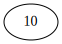

Insertando dato 5 en el árbol
Dato 5 insertado exitosamente


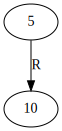

Insertando dato 20 en el árbol
Realizando rotación a la izquierda en el nodo con dato 5
Dato 20 insertado exitosamente


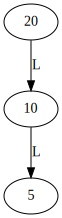

Insertando dato 9 en el árbol
Realizando rotación a la derecha en el nodo con dato 20
Realizando rotación a la derecha en el nodo con dato 10
Dato 9 insertado exitosamente


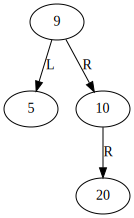

Insertando dato 18 en el árbol
Realizando rotación a la izquierda en el nodo con dato 9
Realizando rotación a la izquierda en el nodo con dato 10
Dato 18 insertado exitosamente


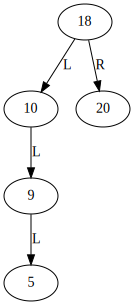

Insertando dato 3 en el árbol
Realizando rotación a la derecha en el nodo con dato 9
Realizando rotación a la derecha en el nodo con dato 18
Realizando rotación a la derecha en el nodo con dato 10
Dato 3 insertado exitosamente


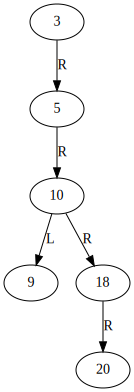

Insertando dato 7 en el árbol
Realizando rotación a la derecha en el nodo con dato 10
Realizando rotación a la izquierda en el nodo con dato 3
Realizando rotación a la izquierda en el nodo con dato 5
Dato 7 insertado exitosamente


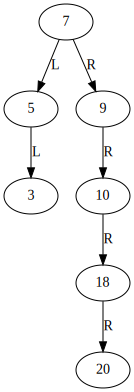

In [6]:
# Creación del árbol Splay y inserción de nodos
tree = SplayTree()
keys_to_insert = [10, 5, 20, 9, 18, 3, 7]
for key in keys_to_insert:
    tree.insert(key)
    # Visualizar el árbol
    dot = visualize_bt(tree)
    display(dot)

## Complejidad del Algoritmo

- **Complejidad de Tiempo:** La inserción en un árbol Splay tiene una complejidad de tiempo amortizada de O(log n), donde n es el número de nodos en el árbol. Esto se debe a la operación de splay que ajusta el árbol después de cada inserción.

- **Complejidad de Espacio:** La complejidad del espacio es O(n) para almacenar el árbol, pero la operación de inserción en sí misma requiere un espacio constante O(1), aparte del espacio utilizado por el árbol.

## Ejercicios Prácticos

1. Modifique la implementación anterior para que el árbol mantenga un contador de los nodos insertados y pruebe su funcionamiento insertando varios nodos.
2. Implemente una función que recorra el árbol en orden y muestre los valores de los nodos para verificar que la estructura del árbol después de varias inserciones es correcta.

Estos ejercicios ayudarán a profundizar la comprensión de la dinámica de inserción en árboles Splay y cómo esta afecta la estructura del árbol.